## Analysis of Robinhood Portfolio

Project by: Pete Aguirre II

In this project, I will do a retuern:risk analysis on my current Robinhood stock portfolio with the help of multiple 
tools using:
- Python 3
- Jupyter Lab/Notebook
- Beautiful Soup
- Markowitz Efficent Frontier

In [319]:
# Libraries Used 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import data as wb
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq

# Magic
%matplotlib inline

## 1.) Data Collection (Portfolio fr. Robinhood)

Obtain portfolio from Robinhood using BeautifulSoup4. 

In [320]:
# On robinhood.com/account, begin copy and paste from html:
# <div class="_35i1NVinE8wTOLz3sUynSw"><header class="_1rWpCWWqvbg316kwNPlwYi">
# Note(s): I had to manipulate some html text in able to extract a span that
#          does not contain an attribute. I named it as: class="filler".
# Change:    <div class="_1bZB-iudENk38jTXhs7BIB"><span>
# Change to: <div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">
#       Another one was added for Total Return, called: class="filler2"
# Change:    </svg><span><span>
# Change to: </svg><span><span class="filler2">
html_doc = '''<div class="row _3q1MICYxMRYo9bR-ASvppe"><div class="col-13"><div class="_35i1NVinE8wTOLz3sUynSw"><header class="_1rWpCWWqvbg316kwNPlwYi"><div class="_2YdFPnDqXSoDKmQtq28ML- _2Tpy7JyddSjzNzIEW6bQgP css-b8vnd1"><span class="css-h74qi0"><span class="css-13vshb9"><span class="css-1k2rdgi">Name</span></span></span><svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1bummxh" width="8" height="5" viewBox="0 0 8 5"><polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform="rotate(-180 27 7)"></polygon></svg></div><div class="_2-4BkMtIykh6hAhu1CkOAi _2Tpy7JyddSjzNzIEW6bQgP css-b8vnd1"><span class="css-h74qi0"><span class="css-13vshb9"><span class="css-1k2rdgi">Symbol</span></span></span><svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1bummxh" width="8" height="5" viewBox="0 0 8 5"><polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform="rotate(-180 27 7)"></polygon></svg></div><div class="_2Tpy7JyddSjzNzIEW6bQgP css-b8vnd1"><span class="css-h74qi0"><span class="css-13vshb9"><span class="css-1k2rdgi">Shares</span></span></span><svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1bummxh" width="8" height="5" viewBox="0 0 8 5"><polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform="rotate(-180 27 7)"></polygon></svg></div><div class="_1aY3uEJAcFViGgVc3SRz4d _2Tpy7JyddSjzNzIEW6bQgP css-b8vnd1"><span class="css-h74qi0"><span class="css-13vshb9"><span class="css-1k2rdgi">Price</span></span></span><svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1bummxh" width="8" height="5" viewBox="0 0 8 5"><polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform="rotate(-180 27 7)"></polygon></svg></div><div class="_2gJfY0FDaI4PWOsRbu1PPj _2Tpy7JyddSjzNzIEW6bQgP css-b8vnd1"><span class="css-h74qi0"><span class="css-13vshb9"><span class="css-1k2rdgi">Average Cost</span></span></span><svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1bummxh" width="8" height="5" viewBox="0 0 8 5"><polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform="rotate(-180 27 7)"></polygon></svg></div><div class="Ue-PUFBPXUbpP5zhTrFKT _3QouEAcfZir2lV5xvc_C0b css-b8vnd1"><span class="css-zc0oik"><span class="css-13vshb9"><span class="css-1k2rdgi">Total Return</span></span></span><svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1n5qlcf" width="8" height="5" viewBox="0 0 8 5"><polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform="rotate(-180 27 7)"></polygon></svg></div><div class="atrP1y1y_C9ULHV4BSwFj _2Tpy7JyddSjzNzIEW6bQgP css-b8vnd1"><span class="css-h74qi0"><span class="css-13vshb9"><span class="css-1k2rdgi">Equity</span></span></span><svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1bummxh" width="8" height="5" viewBox="0 0 8 5"><polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform="rotate(-180 27 7)"></polygon></svg></div></header><div><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB" rel="" href="/stocks/AAPL"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Apple</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">AAPL</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">5</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$439.34</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$400.55</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$193.91</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$2,196.68</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/AMZN"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Amazon</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">AMZN</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">1</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$3,133.10</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$2,978.48</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$154.62</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$3,133.10</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/BABA"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Alibaba</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">BABA</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">10</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$260.24</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$246.09</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$141.54</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$2,602.40</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/BA"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Boeing</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">BA</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">5</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$165.39</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$160.64</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$23.73</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$826.93</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/PFE"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Pfizer</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">PFE</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">10</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$38.55</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$36.96</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$15.82</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$385.45</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/XOM"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Exxon Mobil</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">XOM</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">20</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$43.10</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$42.41</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$13.80</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$862.00</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/DAL"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Delta Air Lines</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">DAL</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">15</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$25.86</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$25.03</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$12.48</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$387.90</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/EADSY"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Airbus</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">EADSY</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">3</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$19.19</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$19.04</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$0.44</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$57.56</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/SCHD"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Schwab US Dividend Equity ETF</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">SCHD</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">4</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$54.85</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$54.77</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$0.34</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$219.40</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/LUV"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Southwest Airlines</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">LUV</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">15</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$31.73</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$31.72</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$0.12</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$475.88</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/AGNC"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">AGNC Investment</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">AGNC</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">18</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$13.64</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$13.65</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq _2mbK0Mw-5HM4q7eeuDqOau" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$0.23</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$245.43</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/AZN"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">AstraZeneca</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">AZN</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">10</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$56.14</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$56.58</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq _2mbK0Mw-5HM4q7eeuDqOau" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$4.37</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$561.40</span></div></div></div></div></a></div></div></div><div class="col-5"><div><div></div><div class=""><div class="css-xi606m _1VlpOyU7eFrHaqBGCEYhGx"><div class="_17yYVtqolFPBnoaIZOPe1A"><svg height="260" width="260"><g transform="translate(130 130)"><circle fill="transparent" r="130"></circle><path fill="rgb(0, 200, 5)" stroke="rgb(0, 200, 5)" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M1.345349136872832,-129.993038412447A130,130,0,0,1,129.93077731188245,4.241828276817813L116.9420123249745,3.683171647576483A117,117,0,0,0,1.345349136872818,-116.99226485413433Z"></path><path fill="rgb(0, 200, 5)" stroke="rgb(0, 200, 5)" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M129.81515523592105,6.930041202887481A130,130,0,0,1,25.20528582953638,127.53310772599943L22.81673206784283,114.753634965278A117,117,0,0,0,116.8263902490131,6.371384573646153Z"></path><path fill="rgb(0, 200, 5)" stroke="rgb(0, 200, 5)" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M22.560388959175416,128.02745350123433A130,130,0,0,1,-105.05374481844154,76.57486989621184L-94.46905700360917,69.02606224353842A117,117,0,0,0,20.171835197481894,115.24798074051289Z"></path><path fill="rgb(0, 200, 5)" stroke="rgb(0, 200, 5)" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M-106.61607983095307,74.38421553985661A130,130,0,0,1,-128.02077768839345,22.59824064078752L-115.19523579100746,20.470897661172376A117,117,0,0,0,-96.0313920161207,66.83540788718318Z"></path><path fill="rgb(0, 200, 5)" stroke="rgb(0, 200, 5)" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M-128.4610621112581,19.94380909574435A130,130,0,0,1,-125.54556283643868,-33.7388744934064L-113.02584974273161,-30.23503414804518A117,117,0,0,0,-115.63552021387208,17.816466116129178Z"></path><path fill="rgb(0, 200, 5)" stroke="rgb(0, 200, 5)" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M-124.82039235897001,-36.33001034066439A130,130,0,0,1,-109.84336176281552,-69.53010769906255L-98.93092009714216,-62.46337365795153A117,117,0,0,0,-112.30067926526293,-32.8261699953032Z"></path><path fill="rgb(0, 200, 5)" stroke="rgb(0, 200, 5)" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M-108.38079886221959,-71.78859545907764A130,130,0,0,1,-88.452180896894,-95.26915395122988L-79.70550855781198,-85.65063867561386A117,117,0,0,0,-97.46835719654622,-64.72186141796662Z"></path><path fill="rgb(0, 200, 5)" stroke="rgb(0, 200, 5)" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M-86.4614899328515,-97.07940439965327A130,130,0,0,1,-66.28305836128179,-111.8327151341454L-59.77045385141072,-100.58077771819217A117,117,0,0,0,-77.71481759376947,-87.46088912403728Z"></path><path fill="rgb(0, 200, 5)" stroke="rgb(0, 200, 5)" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M-63.9543070415542,-113.180592907241A130,130,0,0,1,-41.26434916487027,-123.27714097917614L-37.265474819728425,-110.90664716986167A117,117,0,0,0,-57.44170253168311,-101.92865549128778Z"></path><path fill="rgb(0, 200, 5)" stroke="rgb(0, 200, 5)" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M-38.70409640846241,-124.10476590850348A130,130,0,0,1,-23.58214945878215,-127.84319390137145L-21.35623122233337,-115.03439219632637A117,117,0,0,0,-34.70522206332054,-111.73427209918901Z"></path><path fill="rgb(0, 200, 5)" stroke="rgb(0, 200, 5)" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M-20.93118253885766,-128.30387990051204A130,130,0,0,1,-7.158882369211338,-129.80273650129183L-6.577328634448913,-116.81497655709416A117,117,0,0,0,-18.705264302408857,-115.49507819546696Z"></path><path fill="rgb(0, 200, 5)" stroke="rgb(0, 200, 5)" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M-4.470877451278449,-129.9230974646758A130,130,0,0,1,-1.3453491368732233,-129.993038412447L-1.345349136873196,-116.99226485413432A117,117,0,0,0,-3.8893237165160044,-116.93533752047816Z"></path><path fill="transparent" stroke="none" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M7.960204194457796e-15,-130A130,130,0,0,1,129.87992143116654,5.586233886439509L116.8919292880499,5.027610497795558A117,117,0,0,0,7.164183775012016e-15,-117Z"></path><path fill="transparent" stroke="none" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M129.87992143116654,5.586233886439509A130,130,0,0,1,23.884116404874966,127.7871237001537L21.49570476438747,115.00841133013833A117,117,0,0,0,116.8919292880499,5.027610497795558Z"></path><path fill="transparent" stroke="none" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M23.884116404874966,127.7871237001537A130,130,0,0,1,-105.84058015904684,75.48358491484345L-95.25652214314215,67.93522642335911A117,117,0,0,0,21.49570476438747,115.00841133013833Z"></path><path fill="transparent" stroke="none" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M-105.84058015904684,75.48358491484345A130,130,0,0,1,-128.24778765522765,21.27216400697499L-115.42300888970487,19.14494760627749A117,117,0,0,0,-95.25652214314215,67.93522642335911Z"></path><path fill="transparent" stroke="none" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M-128.24778765522765,21.27216400697499A130,130,0,0,1,-125.1896815894668,-35.03631863549475L-112.67071343052012,-31.53268677194528A117,117,0,0,0,-115.42300888970487,19.14494760627749Z"></path><path fill="transparent" stroke="none" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M-125.1896815894668,-35.03631863549475A130,130,0,0,1,-109.11792365081831,-70.66313563757403L-98.20613128573648,-63.596822073816625A117,117,0,0,0,-112.67071343052012,-31.53268677194528Z"></path><path fill="transparent" stroke="none" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M-109.11792365081831,-70.66313563757403A130,130,0,0,1,-87.46151903812125,-96.17942964867464L-78.71536713430913,-86.56148668380717A117,117,0,0,0,-98.20613128573648,-63.596822073816625Z"></path><path fill="transparent" stroke="none" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M-87.46151903812125,-96.17942964867464A130,130,0,0,1,-65.12217003748229,-112.51267915043728L-58.609953033734065,-101.26141123539355A117,117,0,0,0,-78.71536713430913,-86.56148668380717Z"></path><path fill="transparent" stroke="none" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M-65.12217003748229,-112.51267915043728A130,130,0,0,1,-39.98636408339321,-123.69757753242511L-35.98772767505389,-111.32781977918259A117,117,0,0,0,-58.609953033734065,-101.26141123539355Z"></path><path fill="transparent" stroke="none" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M-39.98636408339321,-123.69757753242511A130,130,0,0,1,-22.257857922101962,-128.08039569239128L-20.032072129891766,-115.27235612315215A117,117,0,0,0,-35.98772767505389,-111.32781977918259Z"></path><path fill="transparent" stroke="none" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M-22.257857922101962,-128.08039569239128A130,130,0,0,1,-5.815191317656397,-129.8698716020735L-5.233672185890757,-116.88288444186614A117,117,0,0,0,-20.032072129891766,-115.27235612315215Z"></path><path fill="transparent" stroke="none" class="a-5dfed0cc-f2ee-44f2-9658-dd3fee0af2d0 css-189dbpp" d="M-5.815191317656397,-129.8698716020735A130,130,0,0,1,0.12999997833335394,-129.99993500000542L0.11699998050001856,-116.99994150000488A117,117,0,0,0,-5.233672185890757,-116.88288444186614Z"></path><g class="_1TV-kqL2Y8oh4apsO399Rv"><text><tspan class="_1o13RXyKmca5JBXy53xF9I">Stocks</tspan><tspan class="_1hRz3CDONpl3WDMRVk45rE" x="0" y="22px">$11,954.28</tspan><tspan class="_2ZWRloK48y-TqwZxBQPbU-" x="0" y="41px"></tspan></text></g></g></svg></div></div></div></div></div></div>'''

In [321]:
soup = soup(html_doc, 'html.parser')
print(soup.prettify()[0:50000])

<div class="row _3q1MICYxMRYo9bR-ASvppe">
 <div class="col-13">
  <div class="_35i1NVinE8wTOLz3sUynSw">
   <header class="_1rWpCWWqvbg316kwNPlwYi">
    <div class="_2YdFPnDqXSoDKmQtq28ML- _2Tpy7JyddSjzNzIEW6bQgP css-b8vnd1">
     <span class="css-h74qi0">
      <span class="css-13vshb9">
       <span class="css-1k2rdgi">
        Name
       </span>
      </span>
     </span>
     <svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1bummxh" height="5" viewbox="0 0 8 5" width="8">
      <polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform="rotate(-180 27 7)">
      </polygon>
     </svg>
    </div>
    <div class="_2-4BkMtIykh6hAhu1CkOAi _2Tpy7JyddSjzNzIEW6bQgP css-b8vnd1">
     <span class="css-h74qi0">
      <span class="css-13vshb9">
       <span class="css-1k2rdgi">
        Symbol
       </span>
      </span>
     </span>
     <svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1bummxh" height="5" viewbox="0 0 8 5" width="8">
      <polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform

In [322]:
# Extracting headers
headers_txt = []
headers = soup.find_all('span', {'class':'css-1k2rdgi'})
for i in range(len(headers)):
    headers_txt.append(headers[i].text)
    
my_portfolio = pd.DataFrame(columns=[headers_txt])
my_portfolio

,Name,Symbol,Shares,Price,Average Cost,Total Return,Equity


In [323]:
# Extracting company names
names_txt = []
names = soup.find_all('span', {'class':'_2jKxrvkjD73sLQEfH5NTgT'})

for i in range(len(names)):
    names_txt.append(names[i].text)
names_txt = np.array(names_txt)
#names_txt

In [324]:
# Extracting company tickers
ticks_txt = []
ticks = soup.find_all('span', {'class':'_2-4BkMtIykh6hAhu1CkOAi'})

for i in range(len(ticks)):
    ticks_txt.append(ticks[i].text)
ticks_txt = np.array(ticks_txt)
#ticks_txt

In [325]:
# Extracting company shares
shares_txt = []
shares = soup.find_all('span', {'class':'filler'})

for i in range(len(shares)):
    shares_txt.append(int(float(shares[i].text)))
shares_txt = np.array(shares_txt)
#shares_txt

In [326]:
# Extracting company prices
prices_txt = []
prices = soup.find_all('span', {'class':'_1aY3uEJAcFViGgVc3SRz4d'})

for i in range(len(prices)):
    prices_txt.append(prices[i].text)
prices_txt = np.array(prices_txt)
#prices_txt

In [327]:
# Extracting average price obtained
avg_txt = []
avg = soup.find_all('span', {'class':'_2gJfY0FDaI4PWOsRbu1PPj'})

for i in range(len(avg)):
    avg_txt.append(avg[i].text)
avg_txt = np.array(avg_txt)
#avg_txt

In [328]:
# Extracting total return
returns_txt = []
returns = soup.find_all('span', {'class':'filler2'})

for i in range(len(returns)):
    returns_txt.append(returns[i].text)
returns_txt = np.array(returns_txt)
#returns_txt

In [329]:
# Extracting equity
equity_txt = []
equity = soup.find_all('span', {'class':'atrP1y1y_C9ULHV4BSwFj'})

for i in range(len(ticks)):
    equity_txt.append(equity[i].text)
equity_txt = np.array(equity_txt)
#equity_txt

In [330]:
my_portfolio = pd.DataFrame({'Name':names_txt, 'Symbol':ticks_txt, 'Shares':shares_txt, 'Price':prices_txt, 'Average Cost':avg_txt, 'Total Return':returns_txt, 'Equity':equity_txt})
my_portfolio

,Name,Symbol,Shares,Price,Average Cost,Total Return,Equity
0,Apple,AAPL,5,$439.34,$400.55,$193.91,"$2,196.68"
1,Amazon,AMZN,1,"$3,133.10","$2,978.48",$154.62,"$3,133.10"
2,Alibaba,BABA,10,$260.24,$246.09,$141.54,"$2,602.40"
3,Boeing,BA,5,$165.39,$160.64,$23.73,$826.93
4,Pfizer,PFE,10,$38.55,$36.96,$15.82,$385.45
5,Exxon Mobil,XOM,20,$43.10,$42.41,$13.80,$862.00
6,Delta Air Lines,DAL,15,$25.86,$25.03,$12.48,$387.90
7,Airbus,EADSY,3,$19.19,$19.04,$0.44,$57.56
8,Schwab US Dividend Equity ETF,SCHD,4,$54.85,$54.77,$0.34,$219.40
9,Southwest Airlines,LUV,15,$31.73,$31.72,$0.12,$475.88


In [331]:
my_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          12 non-null     object
 1   Symbol        12 non-null     object
 2   Shares        12 non-null     int32 
 3   Price         12 non-null     object
 4   Average Cost  12 non-null     object
 5   Total Return  12 non-null     object
 6   Equity        12 non-null     object
dtypes: int32(1), object(6)
memory usage: 752.0+ bytes


## 2.) Data Cleaning

In [332]:
# Take out all dollar signs in data
# Note: Running this a second time will create an error since the 
#       values would have already been converted to floats
dollar_sign = ['Price', 'Average Cost', 'Total Return', 'Equity']
for d in dollar_sign:
    my_portfolio[d] = my_portfolio[d].str.replace(",", "")
    my_portfolio[d] = my_portfolio[d].str.replace("$", "")
    my_portfolio[d] = pd.to_numeric(my_portfolio[d])

In [333]:
# Confirm that values needed has been converted to floats
my_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          12 non-null     object 
 1   Symbol        12 non-null     object 
 2   Shares        12 non-null     int32  
 3   Price         12 non-null     float64
 4   Average Cost  12 non-null     float64
 5   Total Return  12 non-null     float64
 6   Equity        12 non-null     float64
dtypes: float64(4), int32(1), object(2)
memory usage: 752.0+ bytes


In [334]:
my_portfolio

,Name,Symbol,Shares,Price,Average Cost,Total Return,Equity
0,Apple,AAPL,5,439.34,400.55,193.91,2196.68
1,Amazon,AMZN,1,3133.10,2978.48,154.62,3133.10
2,Alibaba,BABA,10,260.24,246.09,141.54,2602.40
3,Boeing,BA,5,165.39,160.64,23.73,826.93
4,Pfizer,PFE,10,38.55,36.96,15.82,385.45
5,Exxon Mobil,XOM,20,43.10,42.41,13.80,862.00
6,Delta Air Lines,DAL,15,25.86,25.03,12.48,387.90
7,Airbus,EADSY,3,19.19,19.04,0.44,57.56
8,Schwab US Dividend Equity ETF,SCHD,4,54.85,54.77,0.34,219.40
9,Southwest Airlines,LUV,15,31.73,31.72,0.12,475.88


In [335]:
# Convert any '.' to '-' in symbols
#sym = my_portfolio['Symbol']
tick_new = my_portfolio['Symbol'].str.replace(".", "-")

In [336]:
# Confirm that '.' has been replaced by '-' on symbol
my_portfolio

,Name,Symbol,Shares,Price,Average Cost,Total Return,Equity
0,Apple,AAPL,5,439.34,400.55,193.91,2196.68
1,Amazon,AMZN,1,3133.10,2978.48,154.62,3133.10
2,Alibaba,BABA,10,260.24,246.09,141.54,2602.40
3,Boeing,BA,5,165.39,160.64,23.73,826.93
4,Pfizer,PFE,10,38.55,36.96,15.82,385.45
5,Exxon Mobil,XOM,20,43.10,42.41,13.80,862.00
6,Delta Air Lines,DAL,15,25.86,25.03,12.48,387.90
7,Airbus,EADSY,3,19.19,19.04,0.44,57.56
8,Schwab US Dividend Equity ETF,SCHD,4,54.85,54.77,0.34,219.40
9,Southwest Airlines,LUV,15,31.73,31.72,0.12,475.88


In [337]:
# EXTRA DATA GATHERING HERE

total_sum = (my_portfolio['Average Cost']*my_portfolio['Shares']).sum()
weights = []
for i in range(len(my_portfolio)):
    weights.append(round((my_portfolio['Average Cost'][i]*my_portfolio['Shares'][i])/total_sum, 2))
    
my_portfolio = pd.DataFrame({'Name':names_txt, 'Symbol':tick_new, 'Shares':shares_txt, 'Price':prices_txt, 'Average Cost':avg_txt, 'Total Return':returns_txt, 'Equity':equity_txt, 'Weight':weights})
my_portfolio

,Name,Symbol,Shares,Price,Average Cost,Total Return,Equity,Weight
0,Apple,AAPL,5,$439.34,$400.55,$193.91,"$2,196.68",0.18
1,Amazon,AMZN,1,"$3,133.10","$2,978.48",$154.62,"$3,133.10",0.26
2,Alibaba,BABA,10,$260.24,$246.09,$141.54,"$2,602.40",0.22
3,Boeing,BA,5,$165.39,$160.64,$23.73,$826.93,0.07
4,Pfizer,PFE,10,$38.55,$36.96,$15.82,$385.45,0.03
5,Exxon Mobil,XOM,20,$43.10,$42.41,$13.80,$862.00,0.07
6,Delta Air Lines,DAL,15,$25.86,$25.03,$12.48,$387.90,0.03
7,Airbus,EADSY,3,$19.19,$19.04,$0.44,$57.56,0.01
8,Schwab US Dividend Equity ETF,SCHD,4,$54.85,$54.77,$0.34,$219.40,0.02
9,Southwest Airlines,LUV,15,$31.73,$31.72,$0.12,$475.88,0.04


In [338]:
my_portfolio['Weight'].sum()

1.0

## 3.) Data Collection (Historical Prices)

In [339]:
# Collect historical prices
tickers = my_portfolio['Symbol']
start_date = '2015-01-01'
my_data = pd.DataFrame()
for t in tickers:
    my_data[t] = wb.DataReader(t, data_source='yahoo', start=start_date)['Adj Close']

In [340]:
my_data = my_data.dropna()
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1408 entries, 2015-01-02 to 2020-08-05
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1408 non-null   float64
 1   AMZN    1408 non-null   float64
 2   BABA    1408 non-null   float64
 3   BA      1408 non-null   float64
 4   PFE     1408 non-null   float64
 5   XOM     1408 non-null   float64
 6   DAL     1408 non-null   float64
 7   EADSY   1408 non-null   float64
 8   SCHD    1408 non-null   float64
 9   LUV     1408 non-null   float64
 10  AGNC    1408 non-null   float64
 11  AZN     1408 non-null   float64
dtypes: float64(12)
memory usage: 143.0 KB


In [341]:
sec_returns = np.log(my_data/my_data.shift(1))
sec_returns

sec_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1408 entries, 2015-01-02 to 2020-08-05
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1407 non-null   float64
 1   AMZN    1407 non-null   float64
 2   BABA    1407 non-null   float64
 3   BA      1407 non-null   float64
 4   PFE     1407 non-null   float64
 5   XOM     1407 non-null   float64
 6   DAL     1407 non-null   float64
 7   EADSY   1407 non-null   float64
 8   SCHD    1407 non-null   float64
 9   LUV     1407 non-null   float64
 10  AGNC    1407 non-null   float64
 11  AZN     1407 non-null   float64
dtypes: float64(12)
memory usage: 143.0 KB


In [342]:
sec_returns.head()

,AAPL,AMZN,BABA,BA,PFE,XOM,DAL,EADSY,SCHD,LUV,AGNC,AZN
Date,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028576,-0.020731,-0.025417,-0.006950,-0.005441,-0.027743,-0.016814,0.000805,-0.014166,-0.024903,-0.009453,-0.007700
2015-01-06,0.000094,-0.023098,0.022710,-0.011848,0.008309,-0.005331,-0.023855,0.016753,-0.006134,-0.028747,0.000452,-0.024635
2015-01-07,0.013925,0.010544,-0.011584,0.015406,0.013593,0.010082,-0.005308,0.028852,0.011723,0.008368,-0.001357,-0.001028
2015-01-08,0.037703,0.006813,0.028000,0.017528,0.020203,0.016508,0.025642,0.026547,0.018326,0.026126,-0.003628,0.014290


In [343]:
sec_returns.tail()

,AAPL,AMZN,BABA,BA,PFE,XOM,DAL,EADSY,SCHD,LUV,AGNC,AZN
Date,,,,,,,,,,,,
2020-07-30,0.012028,0.006031,0.001148,-0.024760,-0.003607,-0.050302,-0.030796,0.027502,-0.000549,-0.026456,-0.002200,0.021829
2020-07-31,0.099564,0.036294,-0.006829,-0.024693,-0.006734,0.005003,0.001202,-0.036289,-0.003115,-0.002264,-0.001469,-0.037129
2020-08-03,0.024885,-0.016822,0.027194,0.026667,-0.003384,0.004032,0.009169,0.027205,0.004212,0.022092,0.010241,0.018473
2020-08-04,0.006656,0.008620,0.016381,0.017108,0.001043,0.028467,0.018479,0.034814,0.003648,-0.005716,-0.013187,-0.013109
2020-08-05,0.003618,0.020871,0.010283,0.054294,0.001562,0.008704,0.030689,0.042624,0.010866,0.041179,0.013187,-0.002321


## Data Analysis

In [344]:
sec_returns

,AAPL,AMZN,BABA,BA,PFE,XOM,DAL,EADSY,SCHD,LUV,AGNC,AZN
Date,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028576,-0.020731,-0.025417,-0.006950,-0.005441,-0.027743,-0.016814,0.000805,-0.014166,-0.024903,-0.009453,-0.007700
2015-01-06,0.000094,-0.023098,0.022710,-0.011848,0.008309,-0.005331,-0.023855,0.016753,-0.006134,-0.028747,0.000452,-0.024635
2015-01-07,0.013925,0.010544,-0.011584,0.015406,0.013593,0.010082,-0.005308,0.028852,0.011723,0.008368,-0.001357,-0.001028
2015-01-08,0.037703,0.006813,0.028000,0.017528,0.020203,0.016508,0.025642,0.026547,0.018326,0.026126,-0.003628,0.014290
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-30,0.012028,0.006031,0.001148,-0.024760,-0.003607,-0.050302,-0.030796,0.027502,-0.000549,-0.026456,-0.002200,0.021829
2020-07-31,0.099564,0.036294,-0.006829,-0.024693,-0.006734,0.005003,0.001202,-0.036289,-0.003115,-0.002264,-0.001469,-0.037129
2020-08-03,0.024885,-0.016822,0.027194,0.026667,-0.003384,0.004032,0.009169,0.027205,0.004212,0.022092,0.010241,0.018473


In [345]:
for t in tickers:

    
    print("")
    print("#",t)
    print("DAILY")
    print("Daily Return:", round(sec_returns[t].mean()*100, 4), "%")
    print("Daily Risk:", round(sec_returns[t].std()*100, 4), "%")

    print("")

    print("ANNUAL")
    mean_return = round((sec_returns[t].mean()*250)*100, 4)
    std_return = round((sec_returns[t].std()*250**.5)*100, 4)
    print("Annual Return:", mean_return, "%")
    print("Annual Risk:", std_return, "%")
    

    
    


# AAPL
DAILY
Daily Return: 0.1054 %
Daily Risk: 1.8157 %

ANNUAL
Annual Return: 26.3453 %
Annual Risk: 28.7086 %

# AMZN
DAILY
Daily Return: 0.1664 %
Daily Risk: 1.9186 %

ANNUAL
Annual Return: 41.5901 %
Annual Risk: 30.3353 %

# BABA
DAILY
Daily Return: 0.0667 %
Daily Risk: 2.054 %

ANNUAL
Annual Return: 16.6818 %
Annual Risk: 32.4772 %

# BA
DAILY
Daily Return: 0.0309 %
Daily Risk: 2.6533 %

ANNUAL
Annual Return: 7.7322 %
Annual Risk: 41.9524 %

# PFE
DAILY
Daily Return: 0.0295 %
Daily Risk: 1.3585 %

ANNUAL
Annual Return: 7.3685 %
Annual Risk: 21.4793 %

# XOM
DAILY
Daily Return: -0.0372 %
Daily Risk: 1.6673 %

ANNUAL
Annual Return: -9.299 %
Annual Risk: 26.3627 %

# DAL
DAILY
Daily Return: -0.0365 %
Daily Risk: 2.585 %

ANNUAL
Annual Return: -9.1371 %
Annual Risk: 40.8718 %

# EADSY
DAILY
Daily Return: 0.0433 %
Daily Risk: 2.4385 %

ANNUAL
Annual Return: 10.8157 %
Annual Risk: 38.5555 %

# SCHD
DAILY
Daily Return: 0.0356 %
Daily Risk: 1.1327 %

ANNUAL
Annual Return: 8.8896 %
Annua

In [346]:
sec_returns.idxmin() 

AAPL    2020-03-16
AMZN    2020-03-12
BABA    2015-01-29
BA      2020-03-16
PFE     2020-03-16
XOM     2020-03-09
DAL     2020-03-18
EADSY   2020-03-18
SCHD    2020-03-12
LUV     2020-03-12
AGNC    2020-03-12
AZN     2017-07-27
dtype: datetime64[ns]

In [347]:
sec_returns.idxmax()

AAPL    2020-03-13
AMZN    2015-04-24
BABA    2017-06-08
BA      2020-03-25
PFE     2020-03-13
XOM     2020-03-24
DAL     2020-03-24
EADSY   2020-03-26
SCHD    2020-03-13
LUV     2020-03-13
AGNC    2020-03-25
AZN     2019-02-14
dtype: datetime64[ns]

In [348]:
# Covariance 
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = sec_returns.cov()
return_cov

,AAPL,AMZN,BABA,BA,PFE,XOM,DAL,EADSY,SCHD,LUV,AGNC,AZN
AAPL,0.000330,0.000188,0.000177,0.000219,0.000103,0.000141,0.000184,0.000175,0.000138,0.000157,0.000081,0.000108
AMZN,0.000188,0.000368,0.000195,0.000147,0.000084,0.000096,0.000114,0.000128,0.000103,0.000106,0.000052,0.000089
BABA,0.000177,0.000195,0.000422,0.000180,0.000078,0.000108,0.000167,0.000176,0.000106,0.000136,0.000054,0.000093
BA,0.000219,0.000147,0.000180,0.000704,0.000133,0.000251,0.000436,0.000391,0.000195,0.000340,0.000220,0.000112
PFE,0.000103,0.000084,0.000078,0.000133,0.000185,0.000096,0.000117,0.000110,0.000101,0.000103,0.000055,0.000091
XOM,0.000141,0.000096,0.000108,0.000251,0.000096,0.000278,0.000195,0.000199,0.000143,0.000155,0.000114,0.000079
DAL,0.000184,0.000114,0.000167,0.000436,0.000117,0.000195,0.000668,0.000360,0.000168,0.000449,0.000202,0.000101
EADSY,0.000175,0.000128,0.000176,0.000391,0.000110,0.000199,0.000360,0.000595,0.000160,0.000268,0.000187,0.000125
SCHD,0.000138,0.000103,0.000106,0.000195,0.000101,0.000143,0.000168,0.000160,0.000128,0.000144,0.000088,0.000085
LUV,0.000157,0.000106,0.000136,0.000340,0.000103,0.000155,0.000449,0.000268,0.000144,0.000508,0.000143,0.000089


In [349]:
# Covariance 
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = sec_returns.cov()*250
return_cov

,AAPL,AMZN,BABA,BA,PFE,XOM,DAL,EADSY,SCHD,LUV,AGNC,AZN
AAPL,0.082419,0.046878,0.044163,0.054738,0.025821,0.035285,0.045946,0.043719,0.034497,0.039279,0.020261,0.026913
AMZN,0.046878,0.092023,0.048641,0.036862,0.020973,0.024018,0.028395,0.031916,0.025802,0.026600,0.013079,0.022333
BABA,0.044163,0.048641,0.105477,0.044906,0.019409,0.026911,0.041675,0.043907,0.026533,0.033924,0.013402,0.023283
BA,0.054738,0.036862,0.044906,0.176000,0.033228,0.062631,0.109068,0.097734,0.048804,0.084889,0.055109,0.028048
PFE,0.025821,0.020973,0.019409,0.033228,0.046136,0.023978,0.029152,0.027511,0.025296,0.025763,0.013710,0.022709
XOM,0.035285,0.024018,0.026911,0.062631,0.023978,0.069499,0.048627,0.049708,0.035746,0.038873,0.028512,0.019851
DAL,0.045946,0.028395,0.041675,0.109068,0.029152,0.048627,0.167051,0.089896,0.041993,0.112163,0.050414,0.025166
EADSY,0.043719,0.031916,0.043907,0.097734,0.027511,0.049708,0.089896,0.148653,0.039953,0.067018,0.046716,0.031306
SCHD,0.034497,0.025802,0.026533,0.048804,0.025296,0.035746,0.041993,0.039953,0.032078,0.035968,0.021907,0.021354
LUV,0.039279,0.026600,0.033924,0.084889,0.025763,0.038873,0.112163,0.067018,0.035968,0.127106,0.035783,0.022333


In [350]:
# Correlations
# Determines how close the relationship are between two stocks
return_corr = sec_returns.corr()
return_corr

,AAPL,AMZN,BABA,BA,PFE,XOM,DAL,EADSY,SCHD,LUV,AGNC,AZN
AAPL,1.000000,0.538276,0.473663,0.454488,0.418729,0.466219,0.391569,0.394974,0.670911,0.383759,0.288830,0.369191
AMZN,0.538276,1.000000,0.493713,0.289646,0.321876,0.300333,0.229018,0.272877,0.474902,0.245948,0.176457,0.289929
BABA,0.473663,0.493713,1.000000,0.329588,0.278225,0.314311,0.313956,0.350646,0.456151,0.292987,0.168880,0.282334
BA,0.454488,0.289646,0.329588,1.000000,0.368751,0.566294,0.636086,0.604228,0.649529,0.567558,0.537602,0.263300
PFE,0.418729,0.321876,0.278225,0.368751,1.000000,0.423449,0.332061,0.332204,0.657548,0.336423,0.261230,0.416377
XOM,0.466219,0.300333,0.314311,0.566294,0.423449,1.000000,0.451294,0.489046,0.757070,0.413596,0.442629,0.296546
DAL,0.391569,0.229018,0.313956,0.636086,0.332061,0.451294,1.000000,0.570465,0.573657,0.769739,0.504811,0.242484
EADSY,0.394974,0.272877,0.350646,0.604228,0.332204,0.489046,0.570465,1.000000,0.578581,0.487552,0.495881,0.319776
SCHD,0.670911,0.474902,0.456151,0.649529,0.657548,0.757070,0.573657,0.578581,1.000000,0.563286,0.500594,0.469535
LUV,0.383759,0.245948,0.292987,0.567558,0.336423,0.413596,0.769739,0.487552,0.563286,1.000000,0.410764,0.246696


In [351]:
# Calculating Diversifiable and Non-Diversifiable

# Portfolio variance
pflio_var = np.dot(my_portfolio['Weight'].T, np.dot(sec_returns.cov()*250, my_portfolio['Weight']))
print("Portfolio Variance", pflio_var)

# Portfolio volatility 
pflio_vol = (np.dot(my_portfolio['Weight'].T, np.dot(sec_returns.cov()*250, my_portfolio['Weight'])))**.5
print("Portfolio Volatility:", pflio_vol)

# Calculating variance annually for each tickers
var_a = []
for t in tickers:
    var_a.append(sec_returns[t].var()*250)

var_a = np.array(var_a)
variances = pd.DataFrame({'Name':names_txt, 'Variance':var_a})

# Diversifiable Risk
# div_risk = pflio_var - my_portfolio['Weight'][0]**2*variances['Variance'][0] - ...
#                  ... - my_portfolio['Weight'][n]**2*variances['Variance'][n]
div_risk = 0   
for i in range(len(my_portfolio)):
    div_risk -= my_portfolio['Weight'][i]**2*variances['Variance'][i]
    #print(my_portfolio['Name'][i], div_risk)
div_risk = pflio_var - div_risk
print("Diversifiable Risk:", div_risk)

# Non Diversifiable Risk
non_div_risk1 = pflio_var - div_risk
print("Non-Diversifiable Risk:", non_div_risk1)

non_div_risk2 = 0
for i in range(len(my_portfolio)):
    non_div_risk2 += my_portfolio['Weight'][i]**2*variances['Variance'][i]
print("Non-Diversifiable Risk:", non_div_risk2)
print("Non-Diversifiable Risk:", non_div_risk2 == non_div_risk1)


##test = my_portfolio['Weight'].diff()
#print(test)

Portfolio Variance 0.047652283521539454
Portfolio Volatility: 0.21829402997228178
Diversifiable Risk: 0.06345944474901129
Non-Diversifiable Risk: -0.015807161227471833
Non-Diversifiable Risk: 0.01580716122747183
Non-Diversifiable Risk: False


In [352]:
no_assets = len(tickers)
no_assets

12

In [353]:
pflio_ret = []
pflio_vol = [] 
pflio_wei = []

for x in range(10000):
    weights = np.random.random(no_assets)
    weights /= np.sum(weights)
    
    pflio_wei.append(weights)
    pflio_ret.append(np.sum(weights*sec_returns.mean())*250)
    pflio_vol.append(np.sqrt(np.dot(weights.T, np.dot(sec_returns.cov()*250, weights))))
    #print(x, weights)

pflio_wei = np.array(pflio_wei)
pflio_ret = np.array(pflio_ret)
pflio_vol = np.array(pflio_vol)

#print(np.sum(weights))
#pflio_returns, pflio_volatilities

In [354]:
pflio_scenarios = pd.DataFrame({'Return': pflio_ret, 'Volatility': pflio_vol})
pflio_scenarios = pflio_scenarios.sort_values('Return', ascending=True)

In [355]:
pflio_scenarios.head()
pflio_scenarios['Return']

1384    0.007748
4105    0.010633
401     0.014820
1648    0.015937
5668    0.020828
          ...   
8439    0.173088
1677    0.173760
5088    0.176329
8664    0.180244
7755    0.181392
Name: Return, Length: 10000, dtype: float64

In [356]:
pflio_scenarios.tail(3500)

,Return,Volatility
5769,0.104212,0.232904
6520,0.104216,0.218017
1340,0.104223,0.220510
2219,0.104231,0.216482
8360,0.104232,0.206262
...,...,...
8439,0.173088,0.215026
1677,0.173760,0.192938
5088,0.176329,0.224565
8664,0.180244,0.208308


Text(0, 0.5, 'Expected Return')

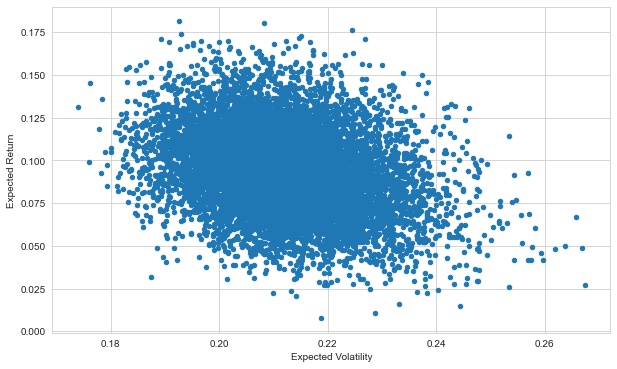

In [357]:
# Efficient Frontier 
pflio_scenarios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [358]:
# For Testing purposes
print(pflio_wei[7988])
print(tickers)
print(np.sum(pflio_wei[7988]))

[0.06683391 0.14953703 0.10373959 0.05421627 0.11168473 0.06166562
 0.14769684 0.08515006 0.00605601 0.10180167 0.04336799 0.06825028]
0      AAPL
1      AMZN
2      BABA
3        BA
4       PFE
5       XOM
6       DAL
7     EADSY
8      SCHD
9       LUV
10     AGNC
11      AZN
Name: Symbol, dtype: object
1.0


## Data Visualization

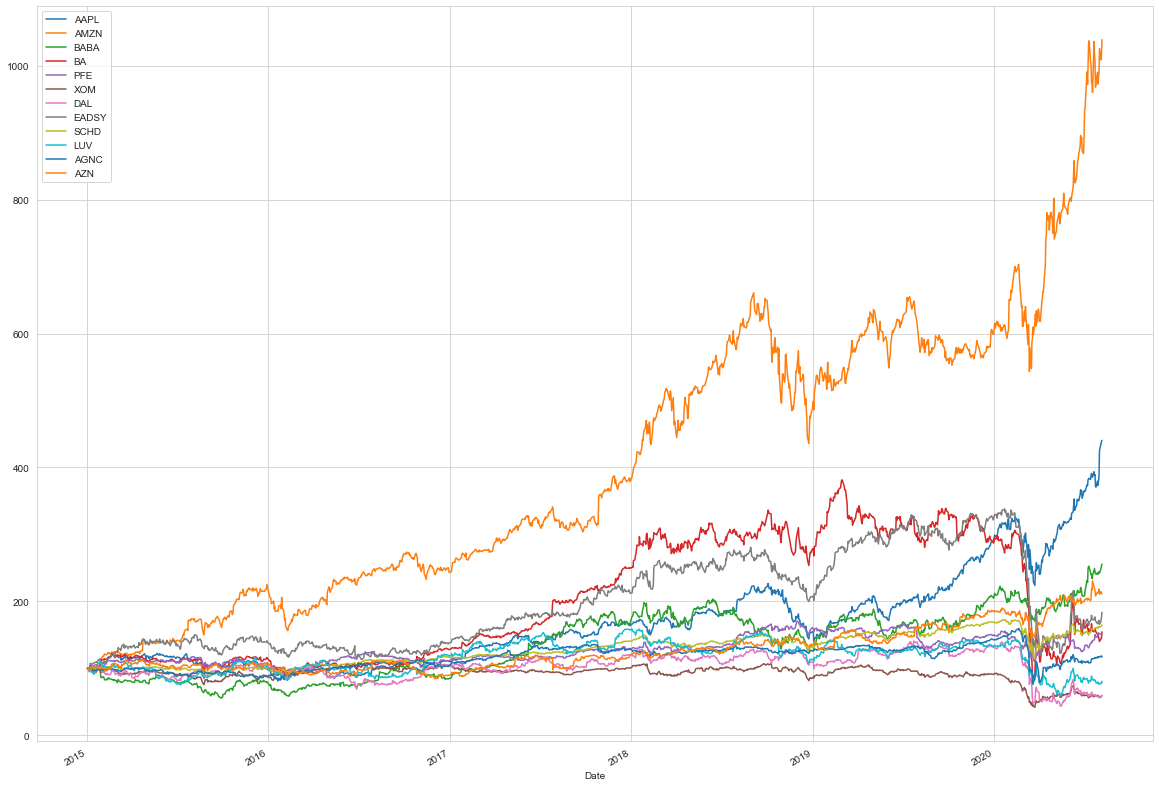

In [359]:
(my_data/my_data.iloc[0]*100).plot(figsize=(20,15))

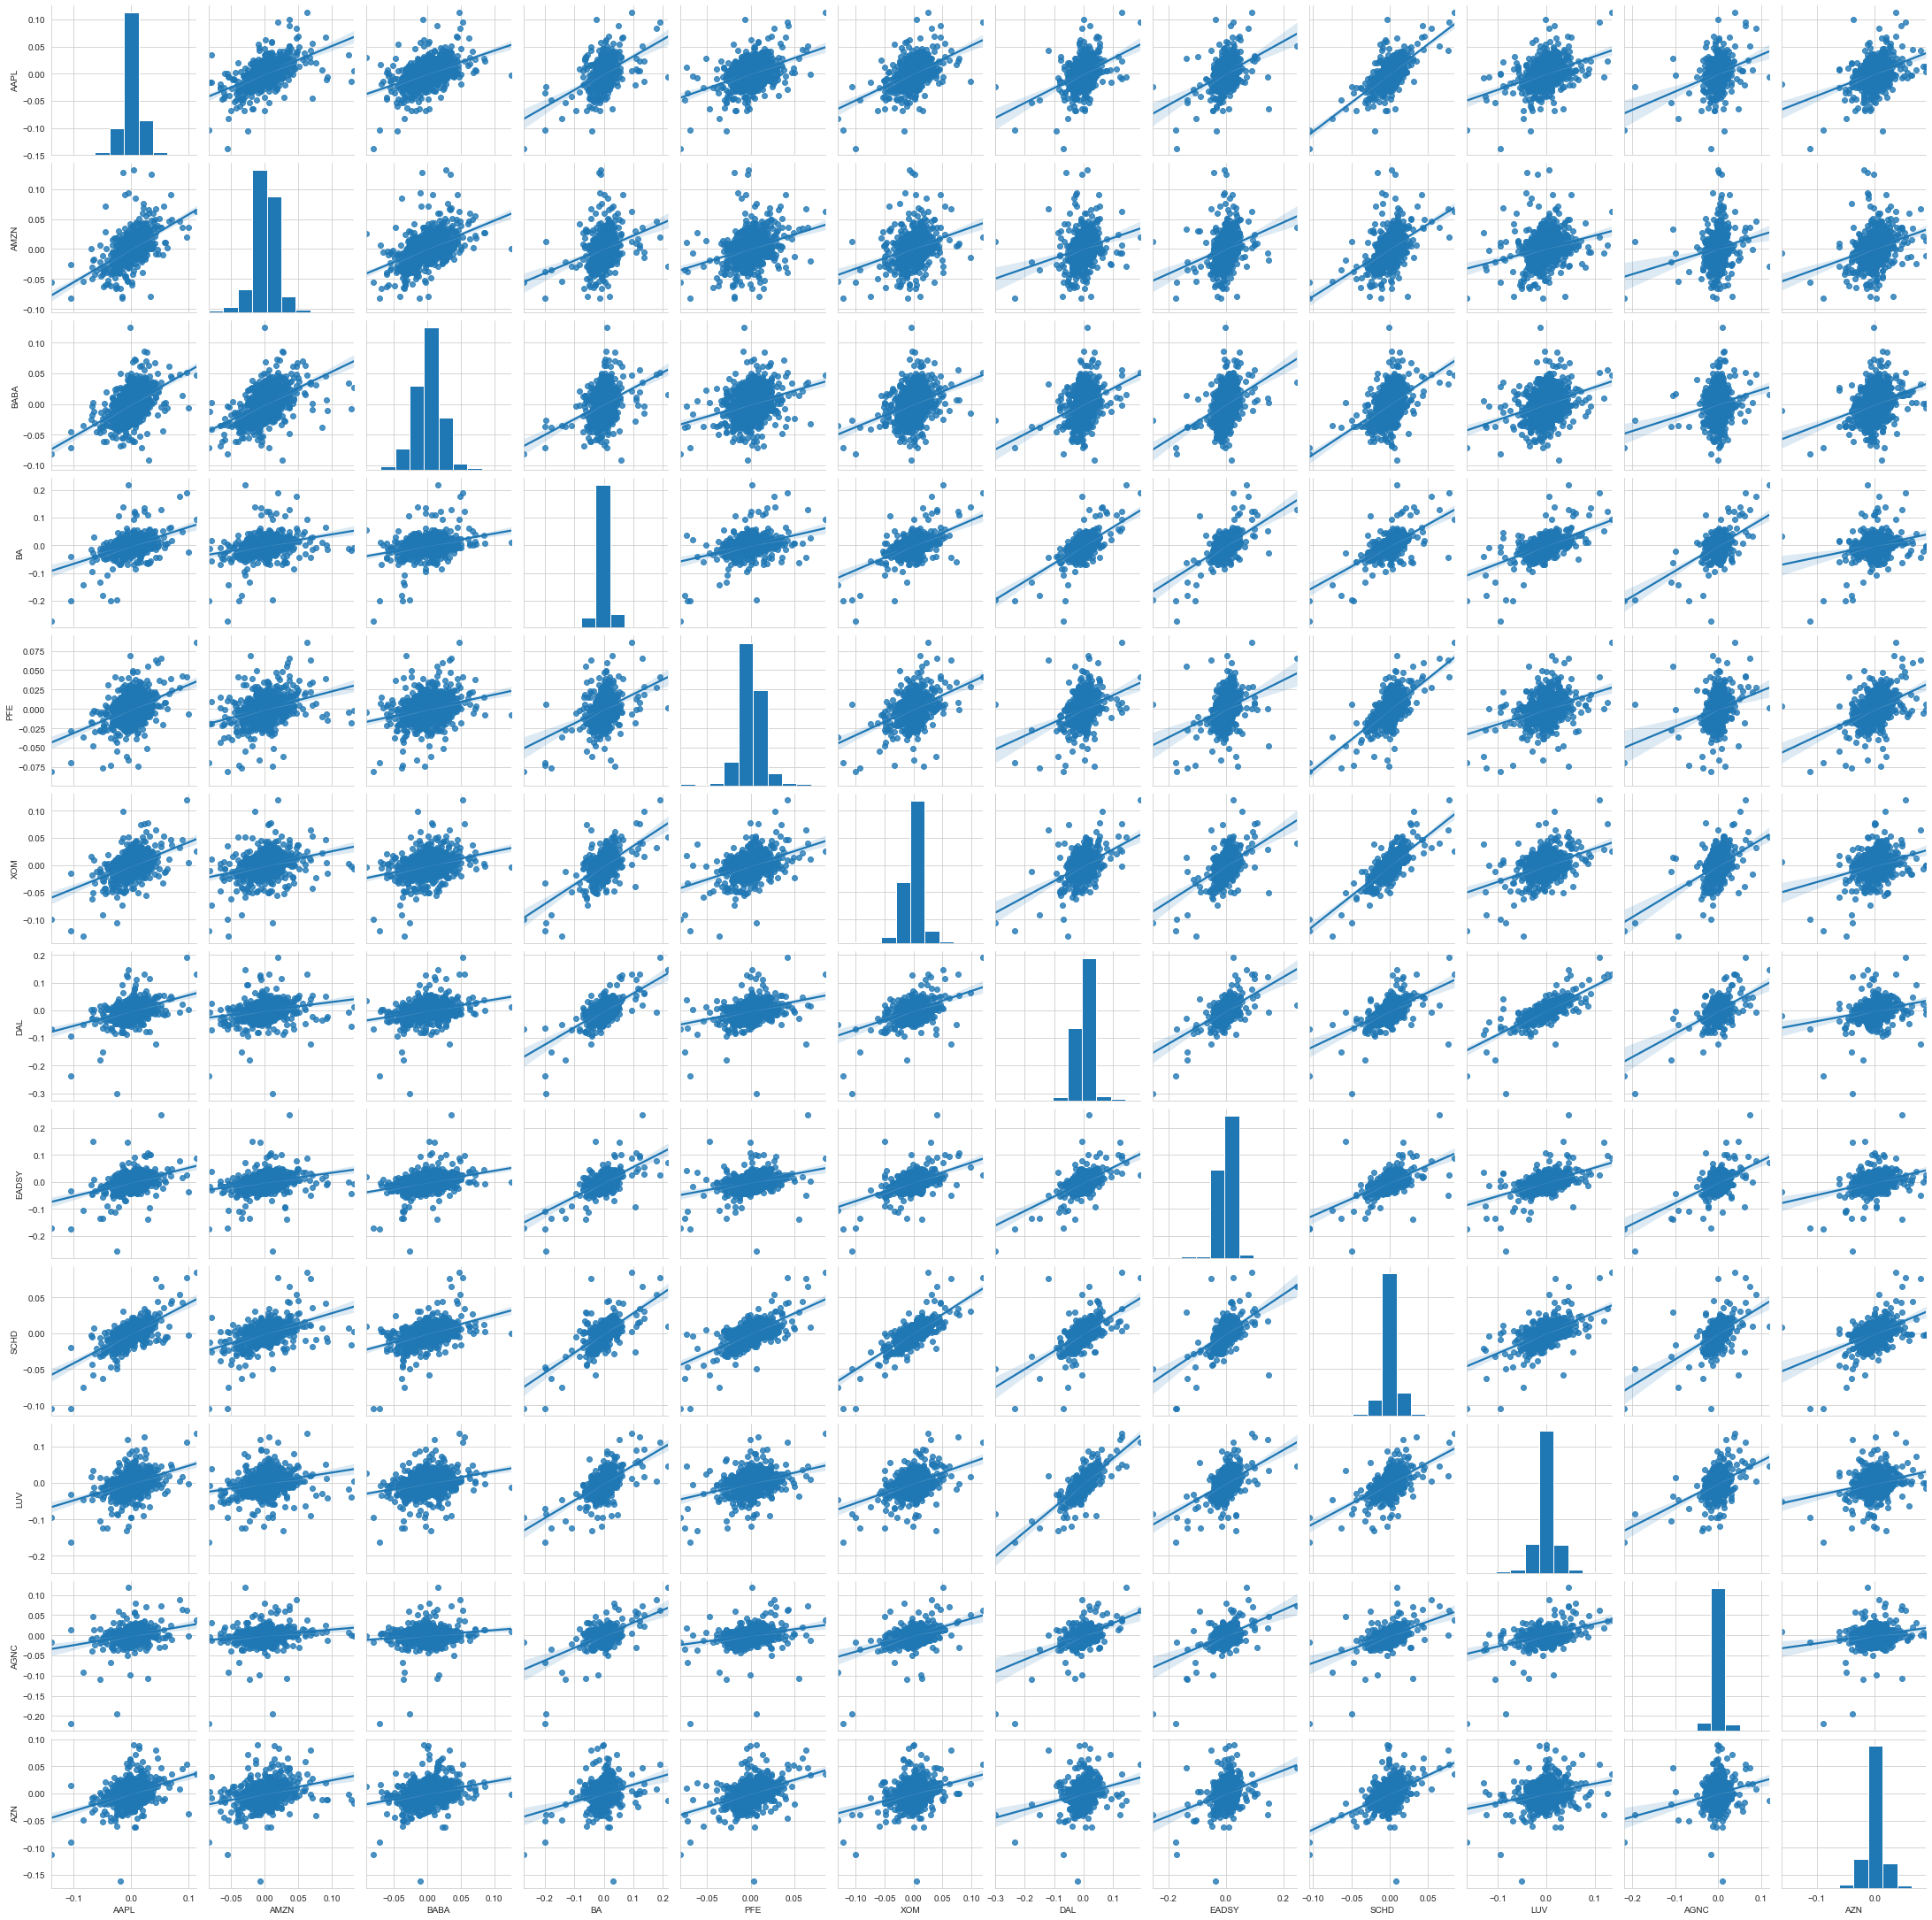

In [360]:
sns.set_style('whitegrid')
sns.pairplot(sec_returns[1:], kind="reg")

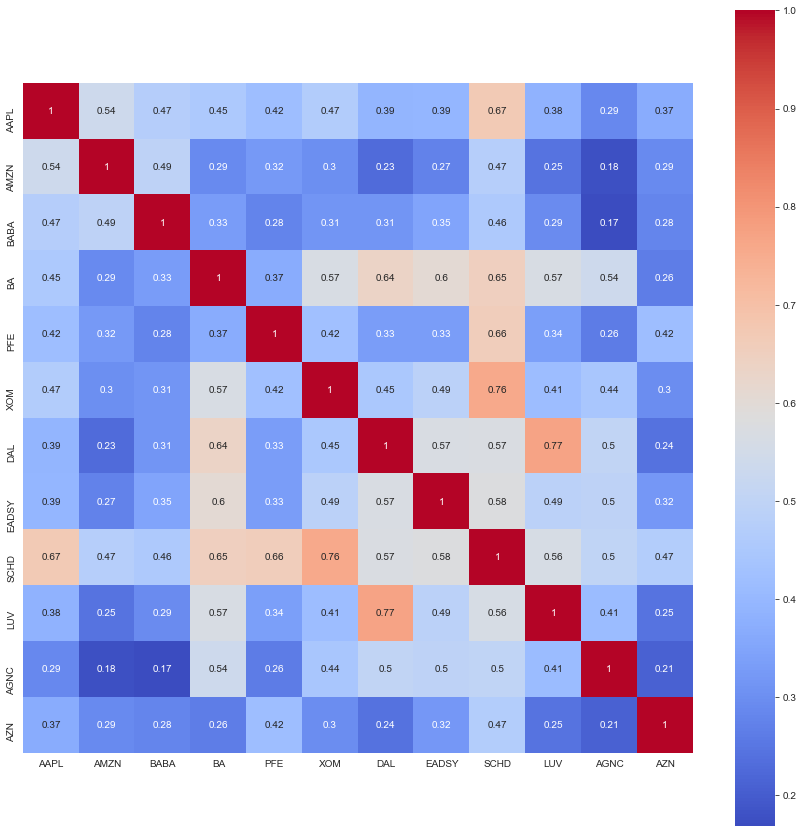

In [361]:
plt.subplots(figsize=(15, 15))
sns.heatmap(return_corr, annot=True, square=True, cmap='coolwarm')
#plt.show()